In [1]:
import numpy as np
import copy

import heapq

from collections import defaultdict

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt


In [2]:
with open('input_day_14.txt', 'r') as file:
    input_string = file.read()

test_input_string = """
p=0,4 v=3,-3
p=6,3 v=-1,-3
p=10,3 v=-1,2
p=2,0 v=2,-1
p=0,0 v=1,3
p=3,0 v=-2,-2
p=7,6 v=-1,-3
p=3,0 v=-1,-2
p=9,3 v=2,3
p=7,3 v=-1,2
p=2,4 v=2,-3
p=9,5 v=-3,-3
""".strip()

test = False

if test:
    input_string = test_input_string

In [3]:
if test:
    C = 11
    R = 7
else:
    C = 101
    R = 103

quadrant_1 = 0
quadrant_2 = 0
quadrant_3 = 0
quadrant_4 = 0

for robot in input_string.split('\n'):

    position = [int(x) for x in robot.split()[0].split("=")[1].split(",")]
    velocity = [int(x) for x in robot.split()[1].split("=")[1].split(",")]

    final_x_pos = (position[0] + velocity[0] * 100) % C
    final_y_pos = (position[1] + velocity[1] * 100) % R

    if final_x_pos < C // 2 and final_y_pos < R//2:
        quadrant_1 += 1
    if final_x_pos < C // 2 and final_y_pos > R//2:
        quadrant_2 += 1
    if final_x_pos > C // 2 and final_y_pos < R//2:
        quadrant_3 += 1
    if final_x_pos > C // 2 and final_y_pos > R//2:
        quadrant_4 += 1

print(quadrant_1 * quadrant_2 * quadrant_3 * quadrant_4)


225943500


6377 *********************************************************************************************************************
                                                                                                   O 
                                                                                                     
                                                                                                     
    O                                                                     OO                         
                                                                                                     
                                                               O        O                            
                                                            O                                        
                O       O                                                                            
   O                                                         

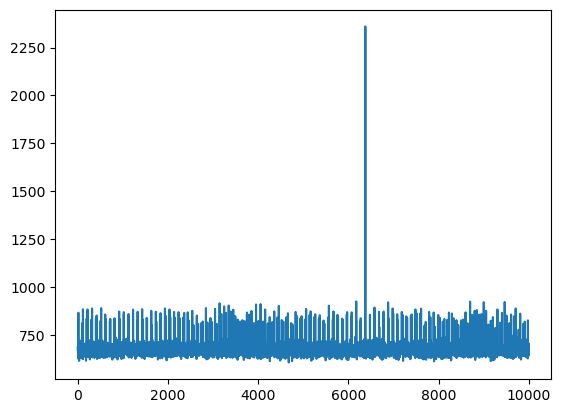

In [4]:
if test:
    C = 11
    R = 7
else:
    C = 101
    R = 103

quadrant_1 = 0
quadrant_2 = 0
quadrant_3 = 0
quadrant_4 = 0

nums_adjacencies = []

for num_steps in range(10000):

    arr = np.zeros((R, C))

    for robot in input_string.split('\n'):

        position = [int(x) for x in robot.split()[0].split("=")[1].split(",")]
        velocity = [int(x) for x in robot.split()[1].split("=")[1].split(",")]

        final_x_pos = (position[0] + velocity[0] * num_steps) % C
        final_y_pos = (position[1] + velocity[1] * num_steps) % R

        arr[final_y_pos, final_x_pos] = 1

    num_adjacencies = 0
    for r in range(R):
        for c in range(C):
            if arr[r, c] == 1:
                for rdif in (-1, 0, 1):
                    for cdif in (-1, 0, 1):
                        if arr[(r+rdif)%R, (c+cdif)%C] == 1:
                            num_adjacencies += 1
    nums_adjacencies.append(num_adjacencies)

    if num_adjacencies > 2000:
        print(num_steps, "*********************************************************************************************************************")

        for r in range(R):
            for c in range(C):
                if arr[r][c]:
                    print("O", end="")
                else:
                    print(" ", end="")
            print("")
        

plt.plot(nums_adjacencies)
